In [1]:
%cd ..

/home/mounim/PHD-Projects/GES


In [2]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc
from Bio.pairwise2 import format_alignment
from src import dataset_simulator
import networkx as nx



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
## Binary tree
### N generations
version = "uniform_dataset"
L = 1000 # len of sequence
mutation_rate = 0.001
generations = 8 # N = g!
random_sequence = dataset_simulator.generate_random_seq(L) #sequence of lenght L
# make binary dataset 
simulated_dataset = dataset_simulator.make_binray_tree(random_sequence, generations = generations, mutation_rate = mutation_rate, mutation_types='S', distribution = 'random')

dataset_simulator.dict_to_fasta(simulated_dataset , './data/'+version+'/' , filename = version)


### 1..7 generation for train | 8..10 genration for testing

In [4]:
original_dataset = simulated_dataset
train_dataset = {}
test_dataset = {}
N_gen = 5
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G < N_gen:
        train_dataset[id] = simulated_dataset[id]
    else:
        test_dataset[id] = simulated_dataset[id]

### NW Align

In [5]:
from Bio import pairwise2
from Bio import Align

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = train_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

,Gen0:N0,Gen1:N1,Gen1:N2,Gen2:N3,Gen2:N4,Gen2:N5,Gen2:N6,Gen3:N7,Gen3:N8,Gen3:N9,...,Gen4:N21,Gen4:N22,Gen4:N23,Gen4:N24,Gen4:N25,Gen4:N26,Gen4:N27,Gen4:N28,Gen4:N29,Gen4:N30
Gen0:N0,0.0,0.1,0.1,0.2,0.2,0.2,0.2,0.3,0.3,0.3,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
Gen1:N1,0.1,0.0,0.2,0.1,0.1,0.3,0.3,0.2,0.2,0.2,...,0.3,0.3,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
Gen1:N2,0.1,0.2,0.0,0.3,0.3,0.1,0.1,0.4,0.4,0.4,...,0.5,0.5,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
Gen2:N3,0.2,0.1,0.3,0.0,0.2,0.4,0.4,0.1,0.1,0.3,...,0.4,0.4,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
Gen2:N4,0.2,0.1,0.3,0.2,0.0,0.4,0.4,0.3,0.3,0.1,...,0.2,0.2,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
Gen2:N5,0.2,0.3,0.1,0.4,0.4,0.0,0.2,0.5,0.5,0.5,...,0.6,0.6,0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.4
Gen2:N6,0.2,0.3,0.1,0.4,0.4,0.2,0.0,0.5,0.5,0.5,...,0.6,0.6,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2
Gen3:N7,0.3,0.2,0.4,0.1,0.3,0.5,0.5,0.0,0.2,0.4,...,0.5,0.5,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
Gen3:N8,0.3,0.2,0.4,0.1,0.3,0.5,0.5,0.2,0.0,0.4,...,0.5,0.5,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
Gen3:N9,0.3,0.2,0.4,0.3,0.1,0.5,0.5,0.4,0.4,0.0,...,0.3,0.3,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7


In [6]:
names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])


### KNN

In [7]:
import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        print(i + ": ", list(Y.columns))
        for c in list(Y.columns):
            edges.append([i, c])

Gen0:N0:  ['Gen1:N1']
Gen1:N1:  ['Gen0:N0']
Gen1:N2:  ['Gen0:N0']
Gen2:N3:  ['Gen1:N1']
Gen2:N4:  ['Gen1:N1']
Gen2:N5:  ['Gen1:N2']
Gen2:N6:  ['Gen1:N2']
Gen3:N7:  ['Gen2:N3']
Gen3:N8:  ['Gen2:N3']
Gen3:N9:  ['Gen2:N4']
Gen3:N10:  ['Gen2:N4']
Gen3:N11:  ['Gen2:N5']
Gen3:N12:  ['Gen2:N5']
Gen3:N13:  ['Gen2:N6']
Gen3:N14:  ['Gen2:N6']
Gen4:N15:  ['Gen3:N7']
Gen4:N16:  ['Gen3:N7']
Gen4:N17:  ['Gen3:N8']
Gen4:N18:  ['Gen3:N8']
Gen4:N19:  ['Gen3:N9']
Gen4:N20:  ['Gen3:N9']
Gen4:N21:  ['Gen3:N10']
Gen4:N22:  ['Gen3:N10']
Gen4:N23:  ['Gen3:N11']
Gen4:N24:  ['Gen3:N11']
Gen4:N25:  ['Gen3:N12']
Gen4:N26:  ['Gen3:N12']
Gen4:N27:  ['Gen3:N13']
Gen4:N28:  ['Gen3:N13']
Gen4:N29:  ['Gen3:N14']
Gen4:N30:  ['Gen3:N14']


### Plot Network

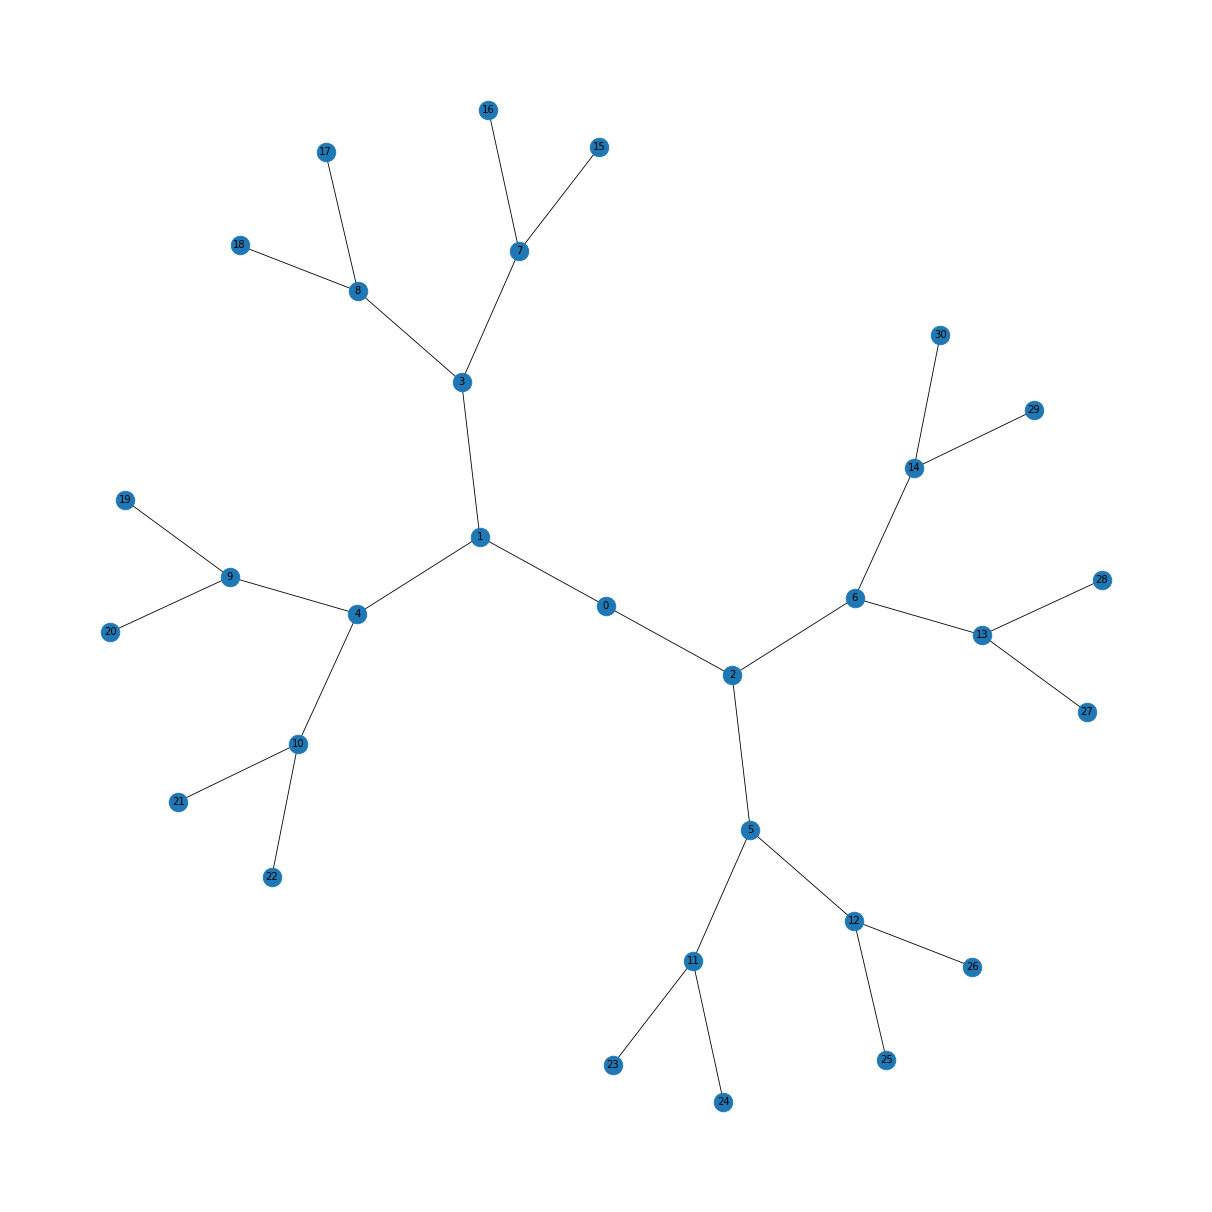

In [8]:
Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id).split('N')[1]
    i+=1
id_map
edgelist = Edges.replace({0 : id_map, 1 : id_map} )
edgelist.columns = ['source','target']



fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)

### Prepare metadata

In [9]:
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()


#### pairwise2.align.globalms

In [10]:
vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')

/tmp/ipykernel_1837849/1225995260.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/1225995260.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/1225995260.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/1225995260.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/1225995260.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [11]:
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y


Text(0, 0.5, 'Number of variations')

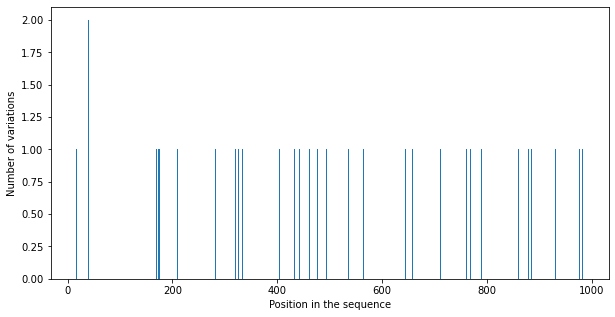

In [12]:
vars = vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
vars.pos.plot.hist(bins=500, linewidth=1)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")

# Precit next gens

In [13]:
mut_rate = pd.concat( [mut_rate ,  pd.DataFrame({'x' : [0] , 'y' : [0]})] )
mut_rate

,x,y
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [14]:
import scipy

from sklearn import linear_model
# predict chnaging positions
#mutation distribution


mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
r = mut_rate_all.x  / mut_rate_all.y
N = round( r.mean() ) # N = number of mut per generation
N

1

In [15]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
last_gen = 4
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G >= last_gen:
        last_gen_dataset[id] = simulated_dataset[id]
last_gen_dataset.keys()

dict_keys(['Gen4:N15', 'Gen4:N16', 'Gen4:N17', 'Gen4:N18', 'Gen4:N19', 'Gen4:N20', 'Gen4:N21', 'Gen4:N22', 'Gen4:N23', 'Gen4:N24', 'Gen4:N25', 'Gen4:N26', 'Gen4:N27', 'Gen4:N28', 'Gen4:N29', 'Gen4:N30'])

## Random Forest LEARNING

In [16]:
Var = vars_all
di = dict({'A':0,'C':1,'G':2,'T':3, '-':4})
Var.ref = Var['ref'].map(di)
Var.tar = Var['tar'].map(di)
Var.pos = Var['pos']
X = Var[['ref','pos']]
y = Var[['tar']]
X

,ref,pos
930,0,930
40,0,40
462,3,462
173,3,173
768,3,768
282,1,282
984,1,984
881,0,881
477,1,477
176,0,176


In [17]:
randomforest = RandomForestClassifier()
randomforest.fit(X, y)

/tmp/ipykernel_1837849/4271867274.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X, y)


RandomForestClassifier()

In [18]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


In [19]:
last_gen_dataset

{'Gen4:N15': 'CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTACAAGGGTCGACAACGTGGTAGTGATGTAGTACGTGAACACGACGGTCCCTTCTCCAGTCCTGAAGGCCATGGACTAGTGCGTCCGATTCTTGCGTCCTGATAACTGTCTGGGATCATAGAACTTATGATATATTTCACCGTAAATCCAACTAAAGCCGAGACGATCGTTTAAGTACAAATGAGCATCAACCATGCTTAAAGCAGCGACTTTATAGCGGTGCCGCTTATCTTTTTCTGCAGCGCGATAGGAACTTGTTGACGACATCGGGGATTTTGTACACGTGAATTCCCACCTCGGCAATCTTTGTAGGGCTGAGAGGGAGCCGGGACCTAACAGACCTTGGCTGGCGTCAGTGGTTCTCCTCTTAAGCTAAGTCATTTGTCACAGCGAGCACTTATAATCCCCCTGTGATCGAGTGGCCGACCCCGACCACTATGTAGTGGTTGCCACACGTCACTCGTTCTCATAATTTAGGCCGGTAGACTGACTTACACAGAGAACCAACCTCACCAAACCTAGAGATTCGCCATGGTTTCGCTGAAACCGGGGTTGTATACACTCAATTCACGGTAATCAACTCGTCTCTGCTCGACTAGTAGATTGGTTAAACTCCATGGATTACCCCGCAAGGGCTAATTTTCATTAGAACTCAATTATGTTGTAGGTGTTGACCCACTGATACGGTATAGATGCAGCGCCATCAGGGCCTCCATCTGAAACTCTTGGGAGCATCAGACTCCCGAGGGAGACGAGGACGTCCCATCTACTGAAGCACTTTTGAGTGCACTTGTAGATCGCCACGCAGAAATCTACACTCTGTAACTGAAGGTACTCAAATAGCATGAGAGGAAAAGGAAACTTCTCCCTGTACGACGTCGCGTGTCACAGGCGGCAATTGGACTGCGAAAGAATATATTTCTCCCTTGATAGTACGAGAGCA

In [20]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
last_gen = 4
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G == last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# for end-node make childs
c = 0
def reverse_map(lst):
    new_list = []
    while len(lst):
        e = lst.pop()
        e = str(e).replace('0','A').replace('1','C').replace('2','G').replace('3','T')
        new_list.append(e)
    return new_list

mu, std = scipy.stats.norm.fit(np.array(vars_all['pos'], dtype=int) )

G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq



Gen4:N15
Gen4:N16
Gen4:N17
Gen4:N18
Gen4:N19
Gen4:N20
Gen4:N21
Gen4:N22
Gen4:N23
Gen4:N24
Gen4:N25
Gen4:N26
Gen4:N27
Gen4:N28
Gen4:N29
Gen4:N30


In [21]:
predicted_dataset = train_dataset | new_dataset

In [22]:
from Bio import pairwise2
from Bio import Align

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

,Gen0:N0,Gen1:N1,Gen1:N2,Gen2:N3,Gen2:N4,Gen2:N5,Gen2:N6,Gen3:N7,Gen3:N8,Gen3:N9,...,Gen5:N23,Gen5:N24,Gen5:N25,Gen5:N26,Gen5:N27,Gen5:N28,Gen5:N29,Gen5:N30,Gen5:N31,Gen5:N32
Gen0:N0,0.0,0.1,0.1,0.2,0.2,0.2,0.2,0.3,0.3,0.3,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
Gen1:N1,0.1,0.0,0.2,0.1,0.1,0.3,0.3,0.2,0.2,0.2,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
Gen1:N2,0.1,0.2,0.0,0.3,0.3,0.1,0.1,0.4,0.4,0.4,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
Gen2:N3,0.2,0.1,0.3,0.0,0.2,0.4,0.4,0.1,0.1,0.3,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
Gen2:N4,0.2,0.1,0.3,0.2,0.0,0.4,0.4,0.3,0.3,0.1,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gen5:N28,0.5,0.6,0.4,0.7,0.7,0.5,0.3,0.8,0.8,0.8,...,0.8,0.8,0.4,0.4,0.2,0.0,0.6,0.6,0.6,0.6
Gen5:N29,0.5,0.6,0.4,0.7,0.7,0.5,0.3,0.8,0.8,0.8,...,0.8,0.8,0.6,0.6,0.6,0.6,0.0,0.2,0.4,0.4
Gen5:N30,0.5,0.6,0.4,0.7,0.7,0.5,0.3,0.8,0.8,0.8,...,0.8,0.8,0.6,0.6,0.6,0.6,0.2,0.0,0.4,0.4
Gen5:N31,0.5,0.6,0.4,0.7,0.7,0.5,0.3,0.8,0.8,0.8,...,0.8,0.8,0.6,0.6,0.6,0.6,0.4,0.4,0.0,0.2


In [23]:
names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Gen0:N0:  Gen1:N1
Gen1:N1:  Gen0:N0
Gen1:N2:  Gen0:N0
Gen2:N3:  Gen1:N1
Gen2:N4:  Gen1:N1
Gen2:N5:  Gen1:N2
Gen2:N6:  Gen1:N2
Gen3:N7:  Gen2:N3
Gen3:N8:  Gen2:N3
Gen3:N9:  Gen2:N4
Gen3:N10:  Gen2:N4
Gen3:N11:  Gen2:N5
Gen3:N12:  Gen2:N5
Gen3:N13:  Gen2:N6
Gen3:N14:  Gen2:N6
Gen4:N15:  Gen3:N7
Gen4:N16:  Gen3:N7
Gen4:N17:  Gen3:N8
Gen4:N18:  Gen3:N8
Gen4:N19:  Gen3:N9
Gen4:N20:  Gen3:N9
Gen4:N21:  Gen3:N10
Gen4:N22:  Gen3:N10
Gen4:N23:  Gen3:N11
Gen4:N24:  Gen3:N11
Gen4:N25:  Gen3:N12
Gen4:N26:  Gen3:N12
Gen4:N27:  Gen3:N13
Gen4:N28:  Gen3:N13
Gen4:N29:  Gen3:N14
Gen4:N30:  Gen3:N14
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Ge

In [24]:
Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

edgelist

,source,target
0,Gen0:N0,Gen1:N1
1,Gen1:N1,Gen0:N0
2,Gen1:N2,Gen0:N0
3,Gen2:N3,Gen1:N1
4,Gen2:N4,Gen1:N1
...,...,...
81,Gen5:N28,Gen4:N28
82,Gen5:N29,Gen4:N29
83,Gen5:N30,Gen4:N29
84,Gen5:N31,Gen4:N30


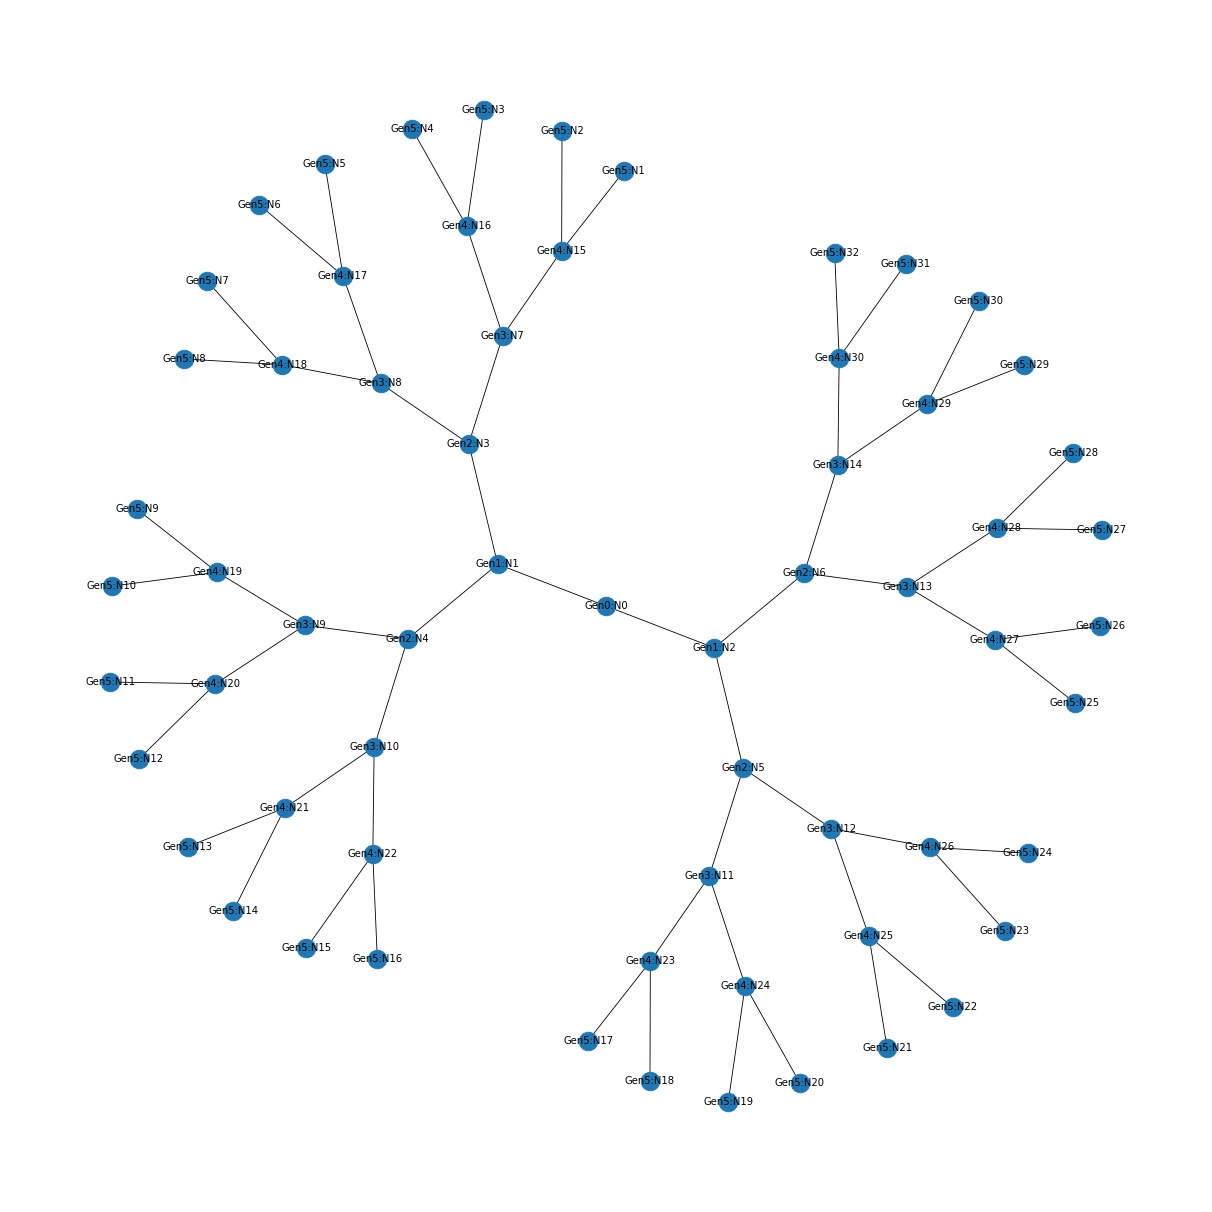

In [25]:
fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)

/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

1.0


Text(0, 0.5, 'Number of variations')

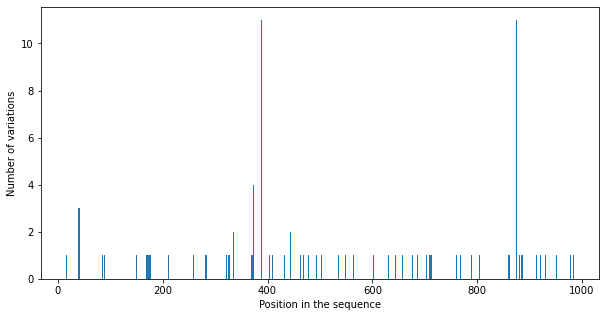

In [26]:


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())

vars = vars_all
vars = vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
vars.pos.plot.hist(bins=500, linewidth=1)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")

In [27]:
# predicted_dataset

In [28]:
backup = predicted_dataset

# GENERATION 2

In [29]:
predicted_dataset = backup 

In [30]:
simulated_dataset = predicted_dataset

new_dataset = {}
# define childs
# select seq from last generation to mutate
last_gen = 5
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G >= last_gen:
        last_gen_dataset[id] = simulated_dataset[id]



In [31]:

c = 0


mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
r = mut_rate_all.x  / mut_rate_all.y
N = round( r.mean() ) # N = number of mut per generation


G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
new_dataset.keys()

Gen5:N1
Gen5:N2
Gen5:N3
Gen5:N4
Gen5:N5
Gen5:N6
Gen5:N7
Gen5:N8
Gen5:N9
Gen5:N10
Gen5:N11
Gen5:N12
Gen5:N13
Gen5:N14
Gen5:N15
Gen5:N16
Gen5:N17
Gen5:N18
Gen5:N19
Gen5:N20
Gen5:N21
Gen5:N22
Gen5:N23
Gen5:N24
Gen5:N25
Gen5:N26
Gen5:N27
Gen5:N28
Gen5:N29
Gen5:N30
Gen5:N31
Gen5:N32


dict_keys(['Gen6:N1', 'Gen6:N2', 'Gen6:N3', 'Gen6:N4', 'Gen6:N5', 'Gen6:N6', 'Gen6:N7', 'Gen6:N8', 'Gen6:N9', 'Gen6:N10', 'Gen6:N11', 'Gen6:N12', 'Gen6:N13', 'Gen6:N14', 'Gen6:N15', 'Gen6:N16', 'Gen6:N17', 'Gen6:N18', 'Gen6:N19', 'Gen6:N20', 'Gen6:N21', 'Gen6:N22', 'Gen6:N23', 'Gen6:N24', 'Gen6:N25', 'Gen6:N26', 'Gen6:N27', 'Gen6:N28', 'Gen6:N29', 'Gen6:N30', 'Gen6:N31', 'Gen6:N32', 'Gen6:N33', 'Gen6:N34', 'Gen6:N35', 'Gen6:N36', 'Gen6:N37', 'Gen6:N38', 'Gen6:N39', 'Gen6:N40', 'Gen6:N41', 'Gen6:N42', 'Gen6:N43', 'Gen6:N44', 'Gen6:N45', 'Gen6:N46', 'Gen6:N47', 'Gen6:N48', 'Gen6:N49', 'Gen6:N50', 'Gen6:N51', 'Gen6:N52', 'Gen6:N53', 'Gen6:N54', 'Gen6:N55', 'Gen6:N56', 'Gen6:N57', 'Gen6:N58', 'Gen6:N59', 'Gen6:N60', 'Gen6:N61', 'Gen6:N62', 'Gen6:N63', 'Gen6:N64'])

In [32]:
predicted_dataset = simulated_dataset | new_dataset

Gen0:N0:  Gen1:N1
Gen1:N1:  Gen0:N0
Gen1:N2:  Gen0:N0
Gen2:N3:  Gen1:N1
Gen2:N4:  Gen1:N1
Gen2:N5:  Gen1:N2
Gen2:N6:  Gen1:N2
Gen3:N7:  Gen2:N3
Gen3:N8:  Gen2:N3
Gen3:N9:  Gen2:N4
Gen3:N10:  Gen2:N4
Gen3:N11:  Gen2:N5
Gen3:N12:  Gen2:N5
Gen3:N13:  Gen2:N6
Gen3:N14:  Gen2:N6
Gen4:N15:  Gen3:N7
Gen4:N16:  Gen3:N7
Gen4:N17:  Gen3:N8
Gen4:N18:  Gen3:N8
Gen4:N19:  Gen3:N9
Gen4:N20:  Gen3:N9
Gen4:N21:  Gen3:N10
Gen4:N22:  Gen3:N10
Gen4:N23:  Gen3:N11
Gen4:N24:  Gen3:N11
Gen4:N25:  Gen3:N12
Gen4:N26:  Gen3:N12
Gen4:N27:  Gen3:N13
Gen4:N28:  Gen3:N13
Gen4:N29:  Gen3:N14
Gen4:N30:  Gen3:N14
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Ge

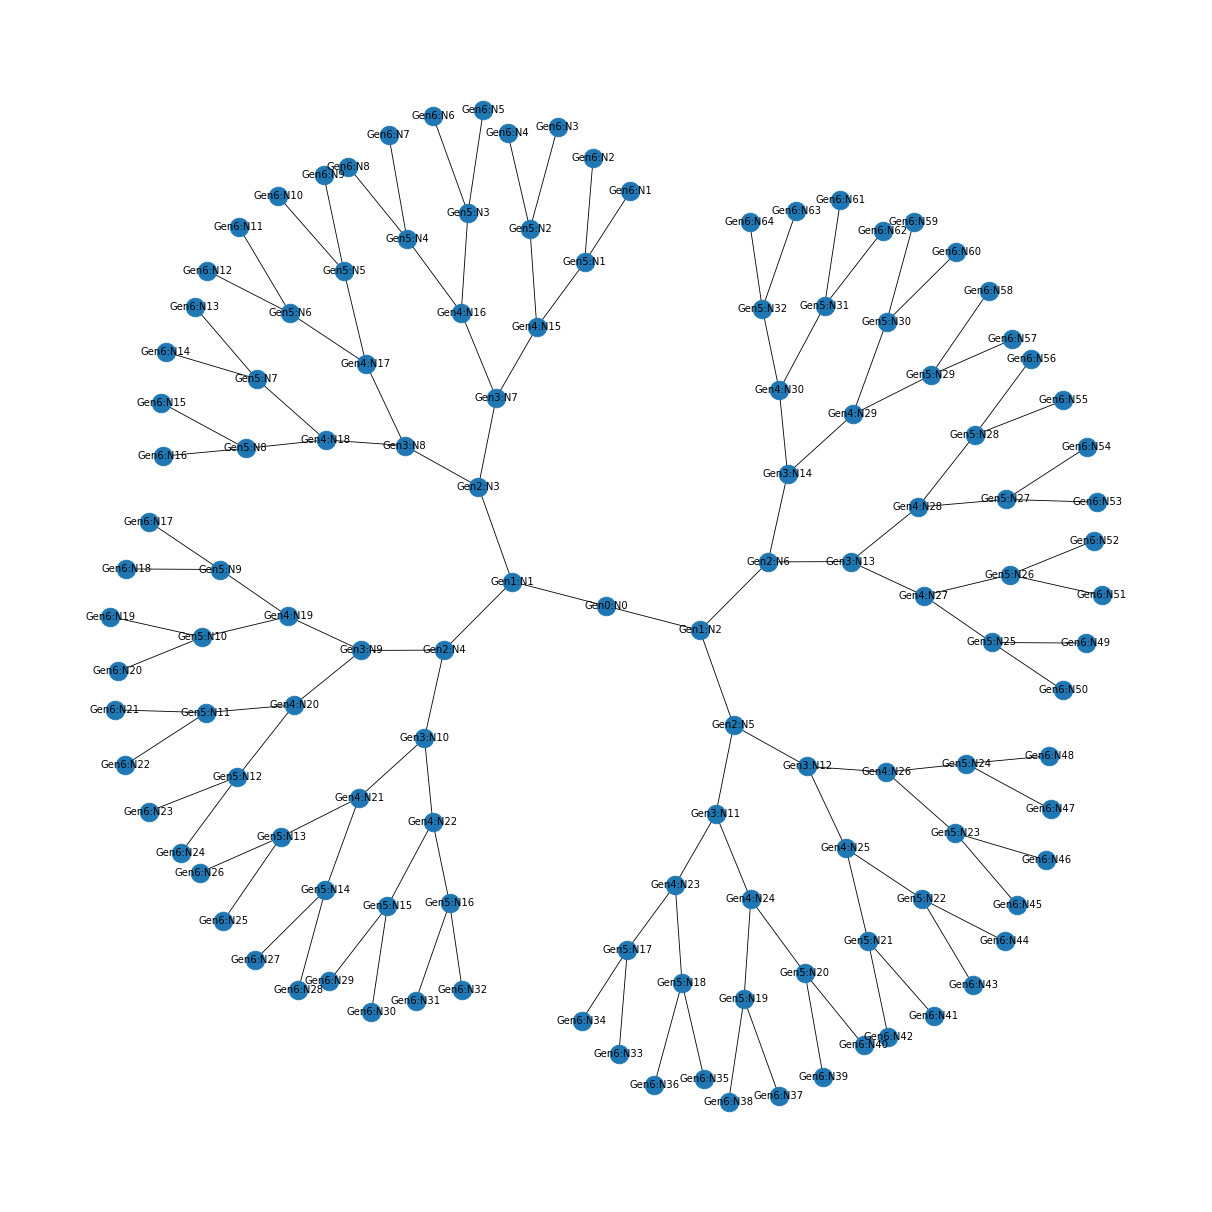

In [33]:




from Bio import pairwise2
from Bio import Align

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])
               
               
               
Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

edgelist


fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


In [34]:

meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta

,Gen,id,seq
0,5,Gen5:N5,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...
1,6,Gen6:N13,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...
2,6,Gen6:N57,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...
3,6,Gen6:N9,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...
4,6,Gen6:N49,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...
...,...,...,...
122,6,Gen6:N28,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...
123,2,Gen2:N6,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...
124,4,Gen4:N16,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...
125,6,Gen6:N22,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...


In [35]:

# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences

,index,target_gen,target,seq_tar,source_gen,source,seq_ref,gen_dif
0,0,5,Gen5:N5,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,6,Gen6:N9,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
1,1,5,Gen5:N5,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,6,Gen6:N10,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
2,2,5,Gen5:N9,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,6,Gen6:N18,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
3,3,5,Gen5:N9,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,6,Gen6:N17,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
4,4,3,Gen3:N14,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,4,Gen4:N29,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,1
...,...,...,...,...,...,...,...,...
200,200,4,Gen4:N16,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,5,Gen5:N3,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
201,201,4,Gen4:N16,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,5,Gen5:N3,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
202,202,4,Gen4:N16,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,5,Gen5:N3,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
203,203,4,Gen4:N16,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,5,Gen5:N3,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1


In [36]:


vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')

/tmp/ipykernel_1837849/2748071044.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/2748071044.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/2748071044.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/2748071044.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/2748071044.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

1.0


Text(0, 0.5, 'Number of variations')

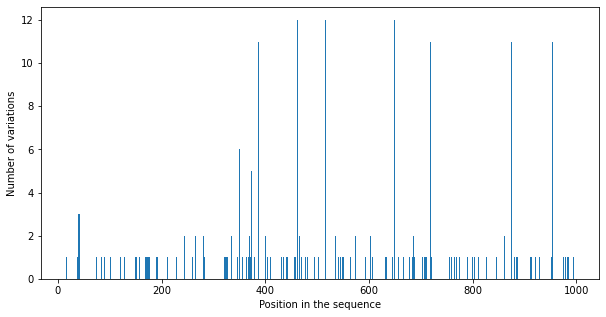

In [37]:
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())

vars = vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
vars.pos.plot.hist(bins=500, linewidth=1)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")

In [38]:
backup = predicted_dataset

# Generation 3

In [39]:
predicted_dataset = backup 

simulated_dataset = predicted_dataset

new_dataset = {}
# define childs
# select seq from last generation to mutate
last_gen = 6
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G >= last_gen:
        last_gen_dataset[id] = simulated_dataset[id]
last_gen_dataset.keys()



dict_keys(['Gen6:N1', 'Gen6:N2', 'Gen6:N3', 'Gen6:N4', 'Gen6:N5', 'Gen6:N6', 'Gen6:N7', 'Gen6:N8', 'Gen6:N9', 'Gen6:N10', 'Gen6:N11', 'Gen6:N12', 'Gen6:N13', 'Gen6:N14', 'Gen6:N15', 'Gen6:N16', 'Gen6:N17', 'Gen6:N18', 'Gen6:N19', 'Gen6:N20', 'Gen6:N21', 'Gen6:N22', 'Gen6:N23', 'Gen6:N24', 'Gen6:N25', 'Gen6:N26', 'Gen6:N27', 'Gen6:N28', 'Gen6:N29', 'Gen6:N30', 'Gen6:N31', 'Gen6:N32', 'Gen6:N33', 'Gen6:N34', 'Gen6:N35', 'Gen6:N36', 'Gen6:N37', 'Gen6:N38', 'Gen6:N39', 'Gen6:N40', 'Gen6:N41', 'Gen6:N42', 'Gen6:N43', 'Gen6:N44', 'Gen6:N45', 'Gen6:N46', 'Gen6:N47', 'Gen6:N48', 'Gen6:N49', 'Gen6:N50', 'Gen6:N51', 'Gen6:N52', 'Gen6:N53', 'Gen6:N54', 'Gen6:N55', 'Gen6:N56', 'Gen6:N57', 'Gen6:N58', 'Gen6:N59', 'Gen6:N60', 'Gen6:N61', 'Gen6:N62', 'Gen6:N63', 'Gen6:N64'])

Gen6:N1
Gen6:N2
Gen6:N3
Gen6:N4
Gen6:N5
Gen6:N6
Gen6:N7
Gen6:N8
Gen6:N9
Gen6:N10
Gen6:N11
Gen6:N12
Gen6:N13
Gen6:N14
Gen6:N15
Gen6:N16
Gen6:N17
Gen6:N18
Gen6:N19
Gen6:N20
Gen6:N21
Gen6:N22
Gen6:N23
Gen6:N24
Gen6:N25
Gen6:N26
Gen6:N27
Gen6:N28
Gen6:N29
Gen6:N30
Gen6:N31
Gen6:N32
Gen6:N33
Gen6:N34
Gen6:N35
Gen6:N36
Gen6:N37
Gen6:N38
Gen6:N39
Gen6:N40
Gen6:N41
Gen6:N42
Gen6:N43
Gen6:N44
Gen6:N45
Gen6:N46
Gen6:N47
Gen6:N48
Gen6:N49
Gen6:N50
Gen6:N51
Gen6:N52
Gen6:N53
Gen6:N54
Gen6:N55
Gen6:N56
Gen6:N57
Gen6:N58
Gen6:N59
Gen6:N60
Gen6:N61
Gen6:N62
Gen6:N63
Gen6:N64
Gen0:N0:  Gen1:N1
Gen1:N1:  Gen0:N0
Gen1:N2:  Gen0:N0
Gen2:N3:  Gen1:N1
Gen2:N4:  Gen1:N1
Gen2:N5:  Gen1:N2
Gen2:N6:  Gen1:N2
Gen3:N7:  Gen2:N3
Gen3:N8:  Gen2:N3
Gen3:N9:  Gen2:N4
Gen3:N10:  Gen2:N4
Gen3:N11:  Gen2:N5
Gen3:N12:  Gen2:N5
Gen3:N13:  Gen2:N6
Gen3:N14:  Gen2:N6
Gen4:N15:  Gen3:N7
Gen4:N16:  Gen3:N7
Gen4:N17:  Gen3:N8
Gen4:N18:  Gen3:N8
Gen4:N19:  Gen3:N9
Gen4:N20:  Gen3:N9
Gen4:N21:  Gen3:N10
Gen4:N22:  Gen3:N10
Gen4

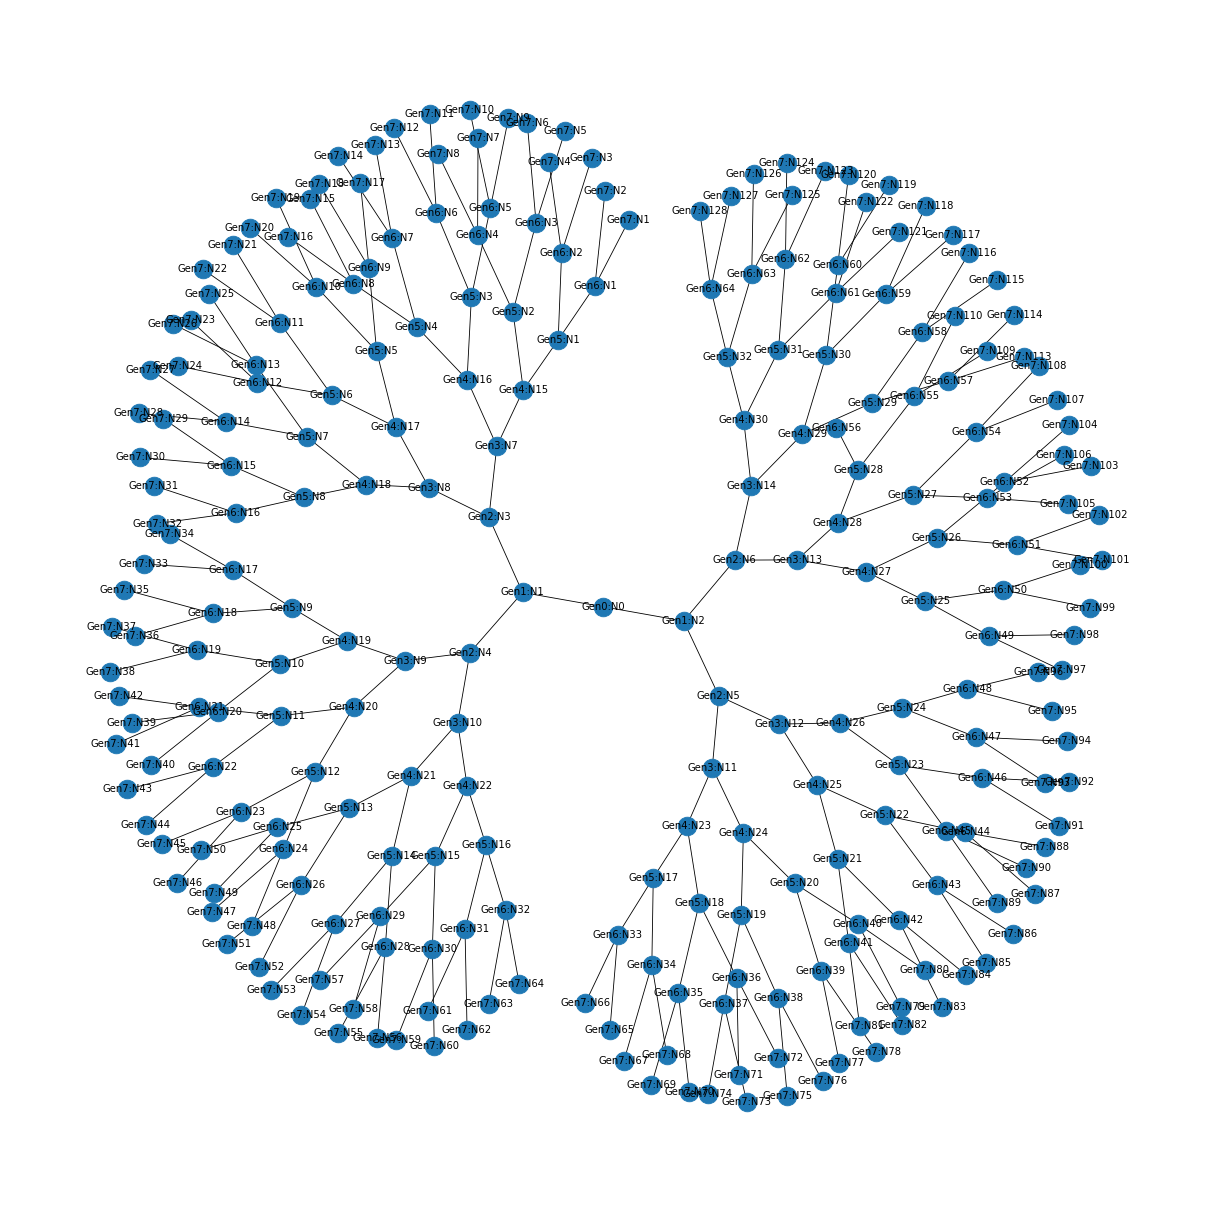

In [40]:

c = 0


mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
r = mut_rate_all.x  / mut_rate_all.y
N = round( r.mean() ) # N = number of mut per generation


G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
new_dataset


predicted_dataset = simulated_dataset | new_dataset


from Bio import pairwise2
from Bio import Align

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])
               
               
               
Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

edgelist


fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


In [41]:


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



,index,target_gen,target,seq_tar,source_gen,source,seq_ref,gen_dif
0,0,6,Gen6:N13,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,7,Gen7:N26,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
1,1,6,Gen6:N13,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,7,Gen7:N25,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
2,2,3,Gen3:N14,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,4,Gen4:N29,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,1
3,3,3,Gen3:N14,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,4,Gen4:N30,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,1
4,4,4,Gen4:N29,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,5,Gen5:N30,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCATGTAC...,1
...,...,...,...,...,...,...,...,...
474,474,5,Gen5:N16,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,6,Gen6:N31,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1
475,475,6,Gen6:N34,CTTTAGAATGGACCCTTTGCTAAATGAAGCGTGCTCGTCCATGTAC...,7,Gen7:N67,CTTTAGAATGGACCCTTTGCTAAATGAAGCGTGCTCGTCCATGTAC...,1
476,476,6,Gen6:N34,CTTTAGAATGGACCCTTTGCTAAATGAAGCGTGCTCGTCCATGTAC...,7,Gen7:N68,CTTTAGAATGGACCCTTTGCTAAATGAAGCGTGCTCGTCCATGTAC...,1
477,477,6,Gen6:N22,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,7,Gen7:N43,CTTTAGAATGGACCCTATGCTAAATGAAGCGTGCTCGTCCGTGTAC...,1


/tmp/ipykernel_1837849/233014221.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/233014221.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/233014221.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/233014221.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/233014221.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

1.0


Text(0, 0.5, 'Number of variations')

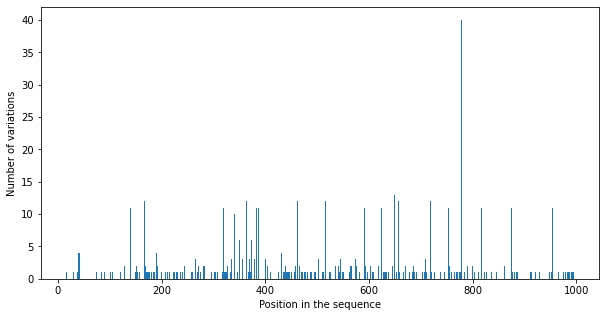

In [42]:


vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())

vars = vars_all
vars = vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
vars.pos.plot.hist(bins=500, linewidth=1)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")

Gen0:N0:  Gen1:N1
Gen1:N1:  Gen0:N0
Gen1:N2:  Gen0:N0
Gen2:N3:  Gen1:N1
Gen2:N4:  Gen1:N1
Gen2:N5:  Gen1:N2
Gen2:N6:  Gen1:N2
Gen3:N7:  Gen2:N3
Gen3:N8:  Gen2:N3
Gen3:N9:  Gen2:N4
Gen3:N10:  Gen2:N4
Gen3:N11:  Gen2:N5
Gen3:N12:  Gen2:N5
Gen3:N13:  Gen2:N6
Gen3:N14:  Gen2:N6
Gen4:N15:  Gen3:N7
Gen4:N16:  Gen3:N7
Gen4:N17:  Gen3:N8
Gen4:N18:  Gen3:N8
Gen4:N19:  Gen3:N9
Gen4:N20:  Gen3:N9
Gen4:N21:  Gen3:N10
Gen4:N22:  Gen3:N10
Gen4:N23:  Gen3:N11
Gen4:N24:  Gen3:N11
Gen4:N25:  Gen3:N12
Gen4:N26:  Gen3:N12
Gen4:N27:  Gen3:N13
Gen4:N28:  Gen3:N13
Gen4:N29:  Gen3:N14
Gen4:N30:  Gen3:N14
Gen5:N31:  Gen4:N15
Gen5:N32:  Gen4:N15
Gen5:N33:  Gen4:N16
Gen5:N34:  Gen4:N16
Gen5:N35:  Gen4:N17
Gen5:N36:  Gen4:N17
Gen5:N37:  Gen4:N18
Gen5:N38:  Gen4:N18
Gen5:N39:  Gen4:N19
Gen5:N40:  Gen4:N19
Gen5:N41:  Gen4:N20
Gen5:N42:  Gen4:N20
Gen5:N43:  Gen4:N21
Gen5:N44:  Gen4:N21
Gen5:N45:  Gen4:N22
Gen5:N46:  Gen4:N22
Gen5:N47:  Gen4:N23
Gen5:N48:  Gen4:N23
Gen5:N49:  Gen4:N24
Gen5:N50:  Gen4:N24
Gen5:N51:  

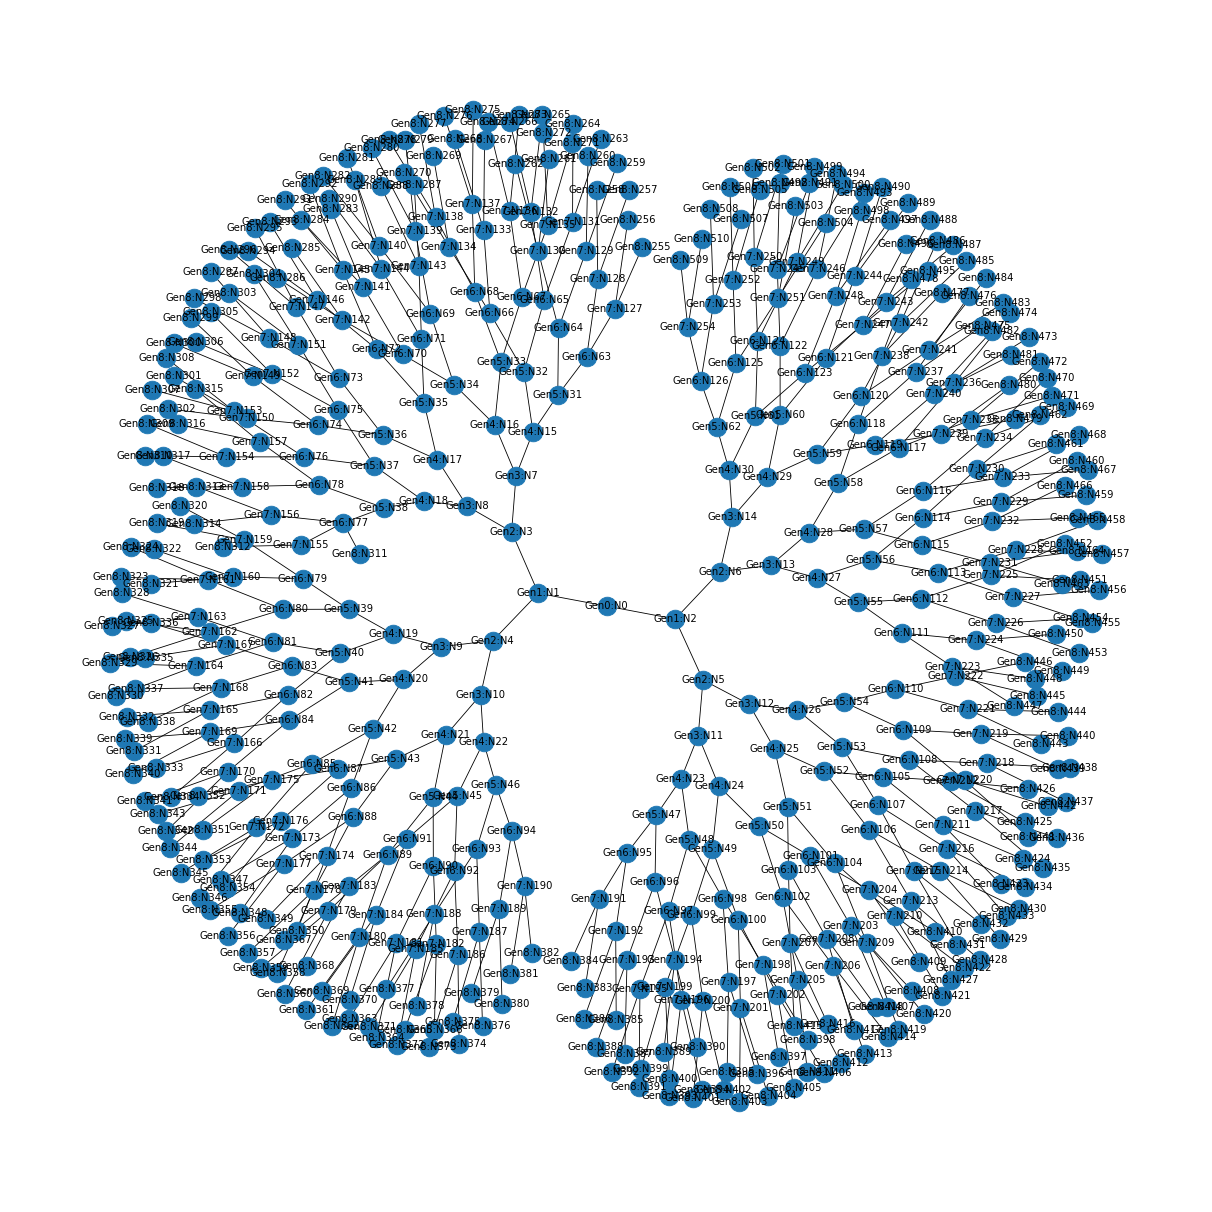

In [43]:


# predicted_dataset = backup 

simulated_dataset = original_dataset

predicted_dataset = original_dataset


from Bio import pairwise2
from Bio import Align

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])
               
               
               
Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

edgelist


fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1837849/465094293.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

0.9990215264187867


Text(0, 0.5, 'Number of variations')

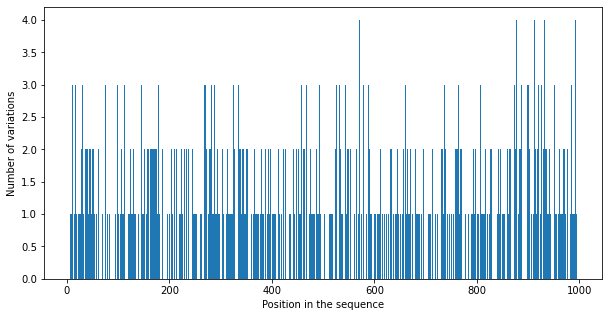

In [44]:


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())

vars = vars_all
vars = vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
vars.pos.plot.hist(bins=500, linewidth=1)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")